<a href="https://colab.research.google.com/github/FatemehAbediK/image-processing/blob/main/scikit_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from skimage import data

In [ ]:
coffee_image = data.coffee()
coins_image = data.coins()

In [ ]:
from skimage import color
gray_scale=color.rgb2gray(coffee_image)
color_image=color.gray2rgb(gray_scale)

In [ ]:
def show_image(image , title="image" , cmap_type="gray"):
  plt.imshow(image , cmap=cmap_type)
  plt.title(title)
  plt.axis("off")
  plt.show()


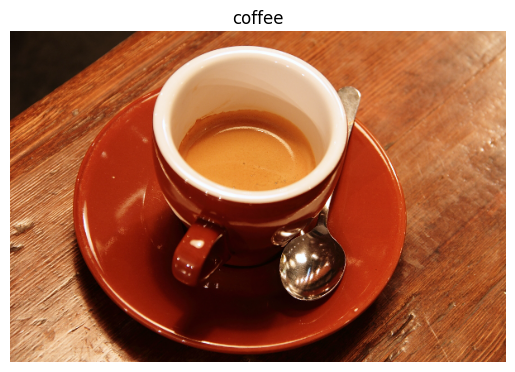

In [ ]:
show_image(coffee_image , title="coffee" , cmap_type="gray")

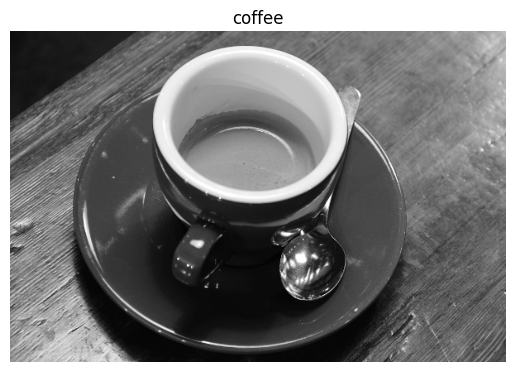

In [ ]:
show_image(gray_scale , title="coffee" , cmap_type="gray")

In [ ]:
brain_img=plt.imread('/content/brain image.jpeg')

In [ ]:
type(brain_img)

numpy.ndarray

In [ ]:
red=brain_img[: ,:  , 0]
green=brain_img[: , : , 1]
blue=brain_img[: , : , 2]

(-0.5, 219.5, 219.5, -0.5)

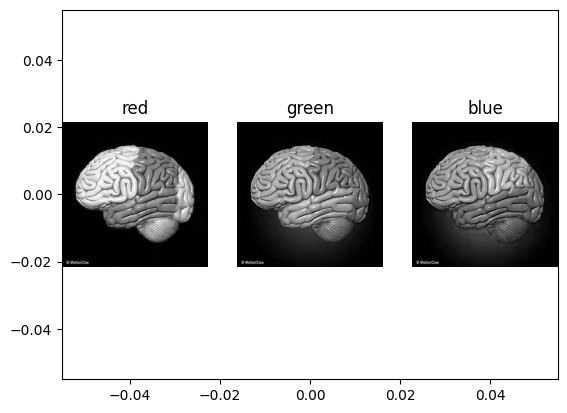

In [ ]:
plt.plot(figsize=(8,4))

plt.subplot(131)
plt.imshow(red , cmap="gray")
plt.title("red")
plt.axis("off")

plt.subplot(132)
plt.imshow(green , cmap="gray")
plt.title("green")
plt.axis("off")

plt.subplot(133)
plt.imshow(blue , cmap="gray")
plt.title("blue")
plt.axis("off")




In [ ]:
brain_img.shape

(220, 220, 3)

In [ ]:
#total number of pixels:145200 pixels!!
brain_img.size

145200

#flipping!

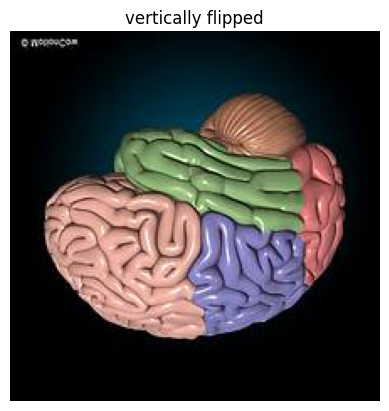

In [ ]:
vertically_flipped=np.flipud(brain_img)
show_image(vertically_flipped , "vertically flipped")

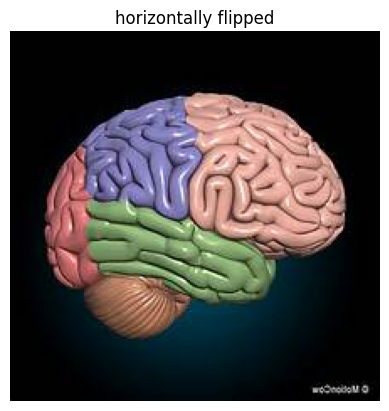

In [ ]:
horizantally_flipped=np.fliplr(brain_img)
show_image(horizantally_flipped , "horizontally flipped")

#histogram

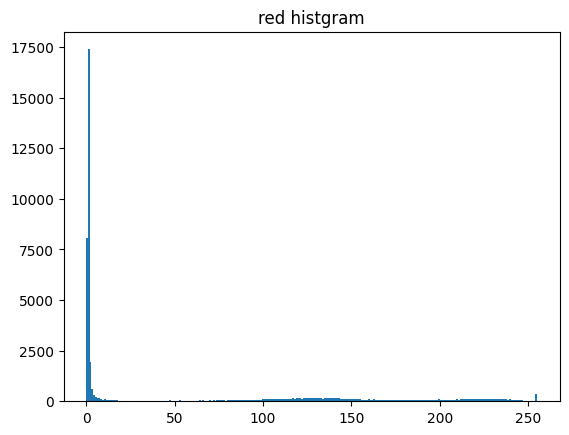

In [ ]:
red=brain_img[: ,: ,0]
plt.hist(red.ravel() , bins=256)
plt.title("red histgram")
plt.show()

#thresholding---only gray scale!(contrast)

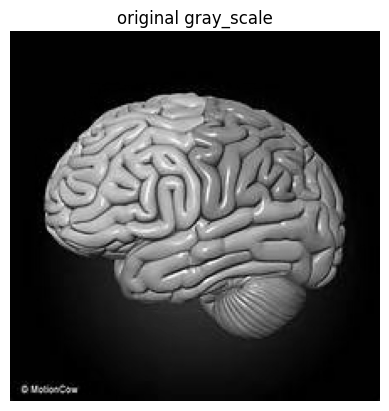

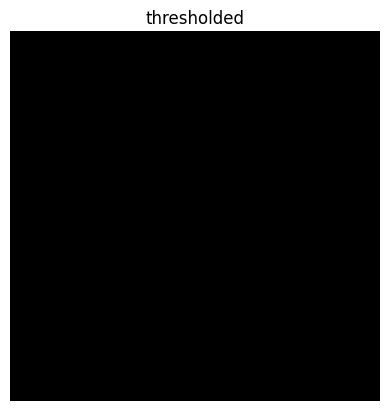

In [ ]:
thresh=127
gray_scale_brain=color.rgb2gray(brain_img)
binary=gray_scale_brain <= thresh

show_image(gray_scale_brain , 'original gray_scale')
show_image(binary , 'thresholded')

NameError: name 'show_plot' is not defined

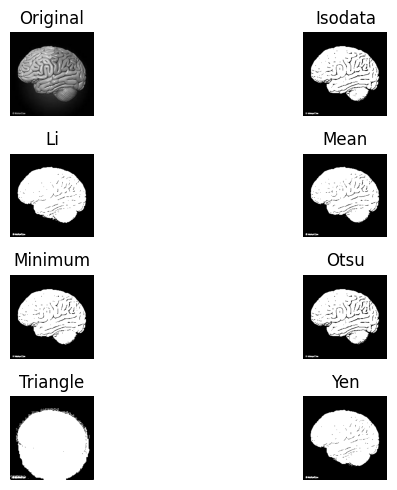

In [ ]:
##global OR local?

from skimage.filters import try_all_threshold  #global ---- even background

fix , ax = try_all_threshold(gray_scale_brain , verbose=False)

show_plot(fig , ax)

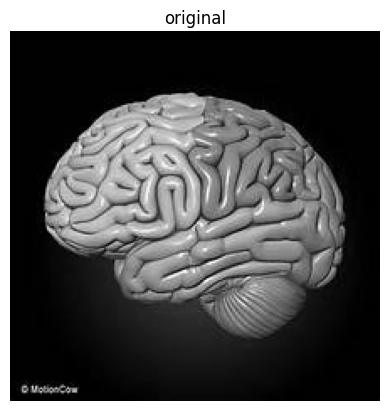

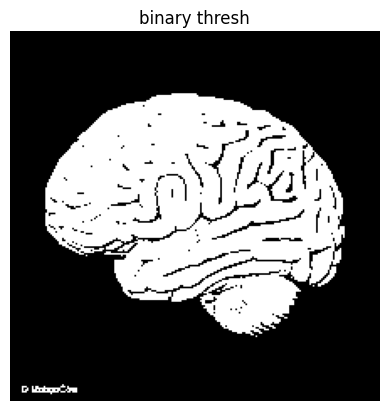

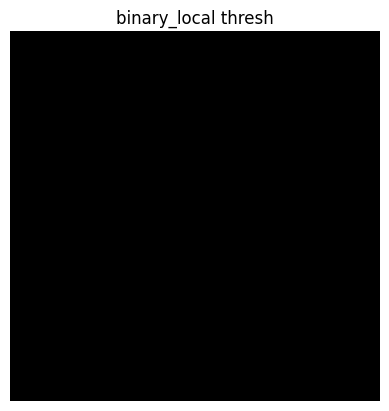

In [ ]:
from skimage.filters import threshold_otsu   #local ----uneven background

thresh=threshold_otsu(gray_scale_brain )

binary = gray_scale_brain > thresh

show_image(gray_scale_brain  , 'original')
show_image(binary , 'binary thresh')



from skimage.filters import threshold_local

block_size=35

local_thresh = threshold_local(gray_scale_brain  , block_size, offset=10)

binary_local = gray_scale_brain  > block_size
show_image(binary_local , 'binary_local thresh')

**filtering**----gray_scale

edge detection:
#####sobel : only the outer lines
#####canny : more detailed

In [ ]:
def plot_comparison(original , filtered ,title):
  fig , (ax1,ax2) = plt.subplots(2 , figsize=(8,6) , sharex =True , sharey = True)
  ax1.imshow(original , cmap =plt.cm.gray)
  ax1.set_title('original')
  ax1.axis('off')
  ax2.imshow(filtered , cmap =plt.cm.gray)
  ax2.set_title(title)
  ax2.axis('off')


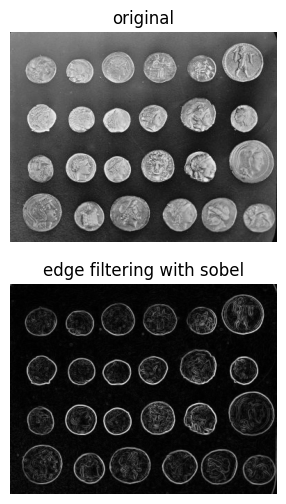

In [ ]:
#sobel:

from skimage.filters import sobel

image_coins = data.coins()
edge_sobel=sobel(image_coins)

plot_comparison(image_coins , edge_sobel , "edge filtering with sobel")

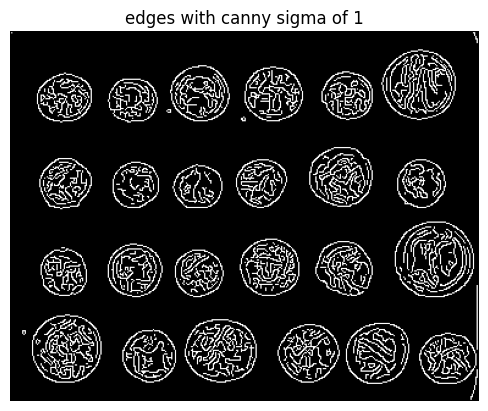

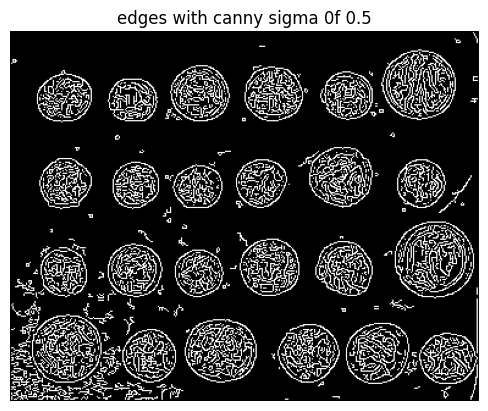

In [ ]:
#canny :

from skimage.feature import canny

coins = data.coins()

canny_edges=canny(coins)
canny_edges_sigma =canny(coins , sigma =0.5)

show_image(canny_edges , "edges with canny sigma of 1")
show_image(canny_edges_sigma , "edges with canny sigma 0f 0.5")

gaussian smoothing:blur edges and reduce contrast!!



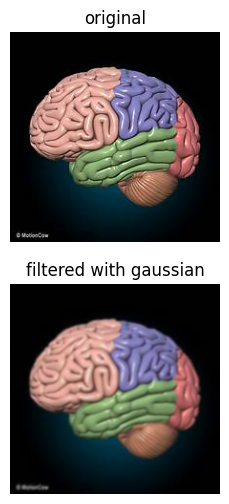

In [ ]:
from skimage.filters import gaussian

# Use channel_axis=-1 if the image is colored (RGB) or channel_axis=None if grayscale
gaussian_image=gaussian(brain_img , channel_axis=-1)

plot_comparison(brain_img , gaussian_image , "filtered with gaussian")

histogram---contrast enhancement !!


1)contrast stretching(normal)
2)contrast equalization
3)contrast adaptive equalization( a type is contrast limited adaptive histogram equalization:CLAHE)

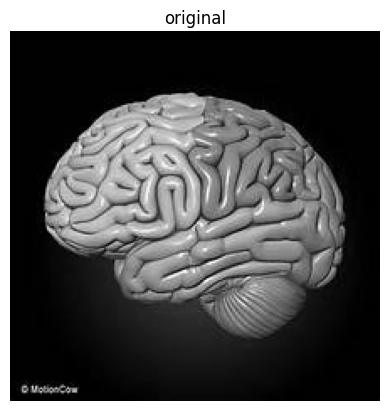

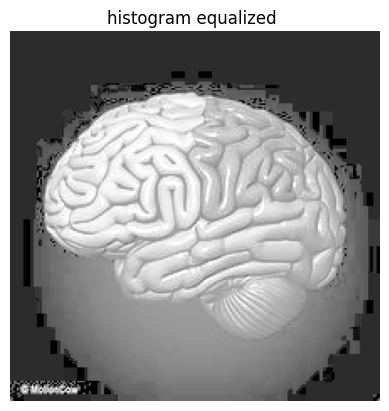

In [ ]:
from skimage import exposure

image_equalized=exposure.equalize_hist(gray_scale_brain)

show_image(gray_scale_brain , 'original')
show_image(image_equalized , 'histogram equalized ')


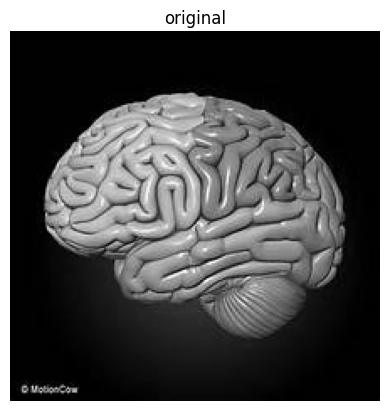

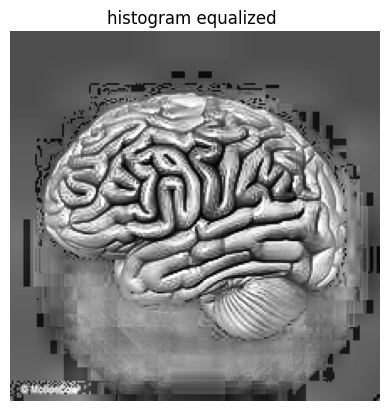

In [ ]:
from skimage import exposure

image_clahe=exposure.equalize_adapthist(gray_scale_brain  , clip_limit=0.3)   # 0 < clip_limit < 1


show_image(gray_scale_brain , 'original')
show_image(image_clahe , 'histogram equalized ')

transformation

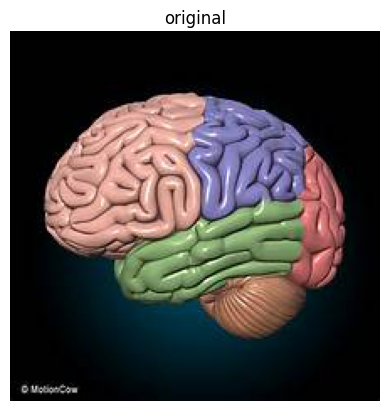

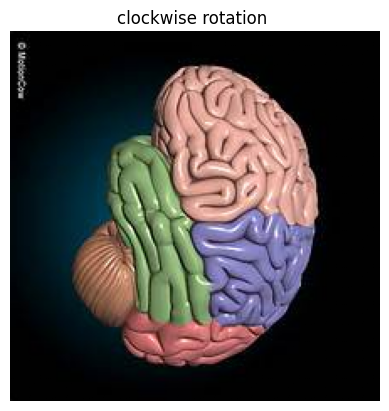

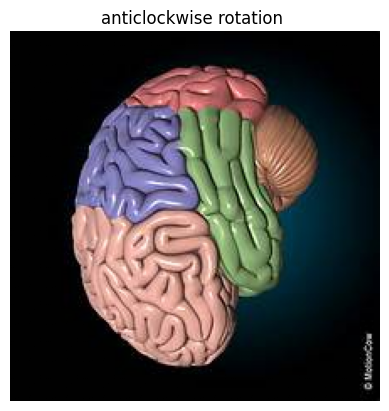

In [ ]:
#rotate

from skimage.transform import rotate
image_rotated_right = rotate(brain_img , -90)  #clockwise
image_rotated_left= rotate(brain_img , 90)   #anticlockwise

show_image(brain_img , 'original')
show_image(image_rotated_right , 'clockwise rotation ')
show_image(image_rotated_left, 'anticlockwise rotation ')

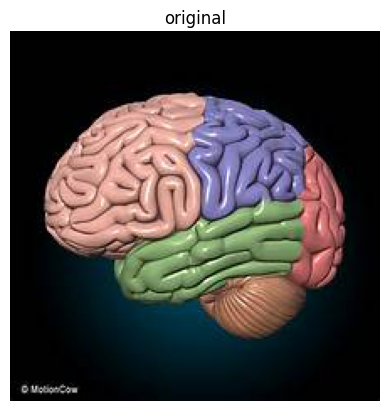

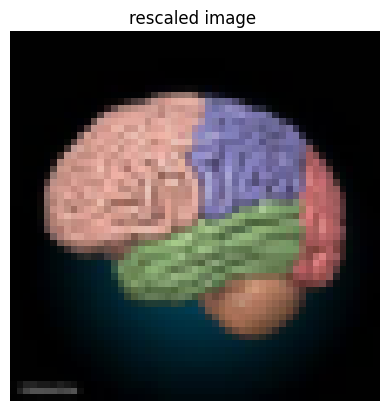

In [ ]:
#rescaling

from skimage.transform import rescale
image_rescaled = rescale(brain_img , 1/4 , anti_aliasing = True , channel_axis=-1 )  #aliasing = pixelated...makes images more blurry!!

show_image(brain_img , 'original')
show_image(image_rescaled , 'rescaled image ')

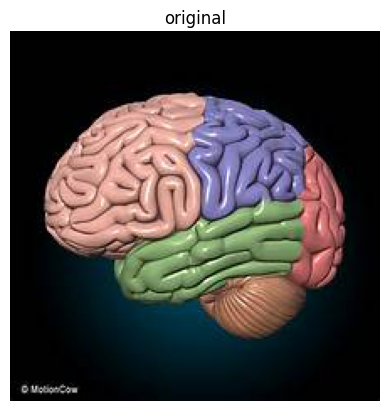

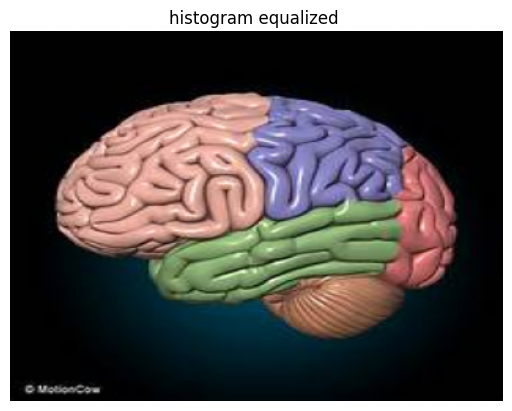

NameError: name 'image' is not defined

In [ ]:
#resize

from skimage.transform import resize

height=300
weidth=400

image_resized = resize(brain_img , (height , weidth) , anti_aliasing = True)

show_image(brain_img, 'original')
show_image(image_resized , 'histogram equalized ')


#you can set proportions for resizing!!!

height = brain_img.shape[0] / 4
weidth = brain_img.shape[1] / 4

image_resized_proportion = resize(brain_img , (height , weidth) , anti_aliasing = True)

show_image(image , 'original')
show_image(image_resized_proportion , 'resized image')

morphology

In [ ]:
#shapes:

from skimage import morphology

square=morphology.square(4)
rectangle=morphology.rectangle(4,2)

print(square , rectangle)



In [ ]:
#erosion & dilaton

from skimage import morphology

selem= morphology.rectangle(12 , 6)

eroded_image=morphology.binary_erosion(image , selem=selem)
dilated_image=morphology.binary_dilation(image , selem=selem)

image restoration

In [ ]:
#add or remove some parts from an old/defected image)

from skimage.restoration import inpaint

def get_mask(image):
  mask=np.zeros(image.shape[:-1])
  #based on locations of defects in the image

  mask[100:102 , 60:62]=1
  mask[102:104 , 62:64]=1
  mask[104:106 , 64:66] =1
return mask

mask=get_mask(defect_image)

restored_image=inpaint.inpaint_biharmonic(defect_image , mask , multichannel=True)

show_image(defect_image)
show_image(restored_image)



noise

In [ ]:
#apply noise:

from skimage.util import random_noise
noisy_image=random.noise(image)

show_image(image , 'original')
show_image(noisy_image , 'noisy image')


In [ ]:
#remove noise(denoising):

#1)total variation filter denoising

from skimage.restoration import denoise_tv_chambolle
denoised_image_cv=denoise_tv_chambolle( image , weight=0.1 , multichannel=True)

#2)bilateral filter
from skimage.restoration import denoise_bilateral
denoised_image_bilateral = denoise_bilateral( image  , multichannel=True)


show_image(image , 'noisy image')
show_image(denoised_image_cv , 'cv denoising')
show_image(denoised_image_bilateral , 'bilateral denoising')

#segmentation
#super pixel segmentation

####supervised segmentation = thresholding!!!
####unsupervised segmentation = Simple Linear Iterative Clustering or SLIC

In [ ]:
#SLIC:

from skimage.segmentation import slic
from skimage.color import label2rgb

segments=slic(image)  #n_segments=300   #you can have this or not!

segmented_image=label2rgb(segments ,image , kind='avg' )



finding contours with scikit_image (like object detection : having the edges of a image!!!!)

In [ ]:
#make image gray_scale
gray_scale_image = color.rgb2gray(image)

#obtain the thresh value
from skimage.filters import threshold_otsu
thresh = threshold_otsu(gray_scale_image)

#apply thresholding
threshold = gray_scale_image > thresh

#countur!!
from skimage import measure

contours=measure.find_contours(threshold , 0.8)   #constant value of 0.8 is the percision how it will show us the contours!!

In [ ]:
#for counting the nukbers of each object or shape in contours you can find it all based on the coordinates of contours:

for contour in contours:
  print(contour.shape)

In [ ]:
#fimd the numbers on dice from determining the contours:

# Create list with the shape of each contour
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 50 as the maximum size of the dots shape
max_dots_shape = 50

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Shows all contours found
show_image_contour(binary, contours)

# Print the dice's number
print("Dice's dots number: {}. ".format(len(dots_contours)))

In [ ]:
#right corner detection:

from skimage.feature import corner_harris

image=color.rgb2gray(image)

measure_image=corner_harris(image)

#the coordinates:

coords=corner_peaks(corner_harris(image) , min_distance=5 , threshold_rel=0.02)                #if you have the min_distance = 60 it will have less points detected!!

print("a total of" , len(coords) , "corners were detected.")

def show_image_with_corners(image , coords , title="corners detected"):
  plt.imshow(image , interpolation='nearest' , cmap='gray')
  plt.title(title)
  plt.plot(coords[:,1] , coords[:,0] , '+r' , markersize=15)
  plt.axis('off')
  plt.show()

show_image_with_corners(image , coords)


face detection!!

In [ ]:
from skimage.feature import Cascade

#the most important line of code!!!
trained_file=data.lbp_frontal_face_cascade_file_name()

detector=Cascade(trained_file)

detected=detector.detect_multi_scale(img=image ,
                                     scale_factor=1.2 ,
                                     step_ratio = 1 ,
                                     min_size= (10,10),
                                     max_size= (200 , 200))

print(detected)

def show_detected_face(result , detected , title="face recognition" ):
  plt.imshow(result)
  img_desc=plt.gca()
  plt.set_cmap('gray')
  plt.title(title)
  plt.axis('off')

  for patch in detected:
    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'] , patch['r'] ) ,
            patch['width'] ,
            patch['height'],
            fill=False , color='r' , linewidth=2
        )
    )
  plt.show()

show_detected_face(image , detected )

In [ ]:
#we can do the sic() segmentation before giving the image to the detector function!


from skimage.segmentation import slic
from skimage.color import label2rgb

segments=slic(image)  #n_segments=300   #you can have this or not!

segmented_image=label2rgb(segments ,image , kind='avg' )

trained_file=data.lbp_frontal_face_cascade_file_name()

detector=Cascade(trained_file)

detected=detector.detect_multi_scale(img=segmented_imag ,
                                     scale_factor=1.2 ,
                                     step_ratio = 1 ,
                                     min_size= (10,10),
                                     max_size= (200 , 200))

print(detected)
show_detected_face(segmented_imag , detected )

#a real world example:privacy protection:blurring faces in a photo

In [ ]:
from skimage.feature import Cascade
from skimage.filters import gaussian
from skimage import data

image = '/content/freinds.jpeg'

def get_face(d):
  x,y = d['r'] , d['c']
  width , height = d['r'] +d['width'] , d['c'] + d['height']
  face=image[x:width , y:height]
  return face

def mergeBlurryFace(image , gaussian_image):
   x,y = d['r'] , d['c']
   width , height = d['r'] +d['width'] , d['c'] + d['height']
   gaussian_image= image[x:width , y:height]
   return image


trained_file=data.lbp_frontal_face_cascade_file_name()

detector=Cascade(trained_file)

detected=detector.detect_multi_scale(img=image,
                                     scale_factor=1.2 ,
                                     step_ratio = 1 ,
                                     min_size= (10,10),
                                     max_size= (200 , 200))
for d in detected:
  face=getFace(d)
  gaussian_face=gaussian(face , multichannel=True , sigma=10)
  resulting_image=mergeBlurryFace(image , gaussian_face)

show_image(resulting_image , 'blurred faces!')

In [ ]:
#now we can do it with opencv:

import cv2
from skimage import io

# Replace with the path to your downloaded XML file
lbp_cascade_path = "path/to/lbpcascade_frontalface.xml"

# Load the cascade file
lbp_cascade = cv2.CascadeClassifier(lbp_cascade_path)

# Load an example image
image = io.imread('path_to_your_image.jpg')

# Convert the image to grayscale for face detection
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform face detection
faces = lbp_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display the result
io.imshow(image)
io.show()